# **Transformations in Digital Images** 
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**

En primer lugar vamos a importar las librerias necesarias para el desarollo del notebook

In [8]:
# importamos las libreiras
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np

Cargamos la imagen con la que vamos a trabajar


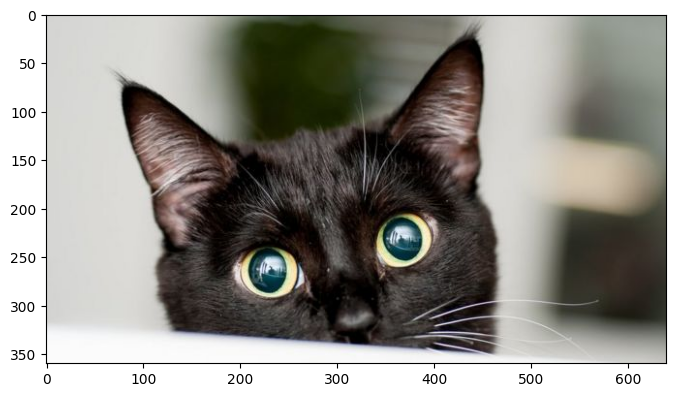

Alto = 360
Ancho = 640
Canales = 3


In [9]:
# ruta de la imagen a cargar
image_path = 'data/cat.jpg'

# cargamos la imagen
image = cv2.imread(image_path)
image  = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.show()

#Mostramos el tamaño de la imagen
print("Alto = " + str(image.shape[0]))
print("Ancho = " + str(image.shape[1]))
print("Canales = " + str(image.shape[2]))

### **Traslación**

En este primer punto se pide trasladar la imagen 50 pixeles en x y 25 en y. El resultado esperado es el siguiente.



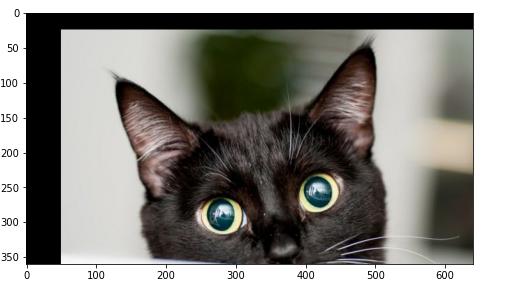

Consultar el siguiente enlace : [learnopencv](https://learnopencv.com/image-rotation-and-translation-using-opencv/)

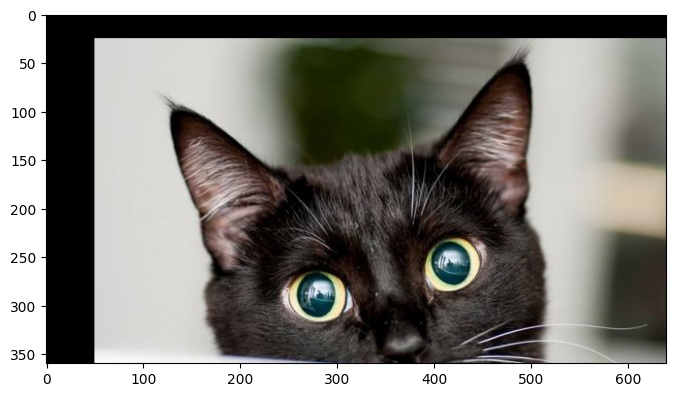

In [10]:
# definimos la distancia a trasladar
translation_x = 50
translation_y = 25

# obtenemos el tamaño de la imagen
height, width = image.shape[:2]

# creamos la matriz de translacion
translation_matrix = np.array([
    [1, 0, translation_x],
    [0, 1, translation_y]
], dtype=np.float32)

# usamos la funcion openv para
translated_image = cv2.warpAffine(src=image, M=translation_matrix, dsize=(width, height))

# mostramos la imagen
plt.imshow(translated_image)
plt.show()

### **Rotación**
En la siguiente actividad se pide rotar la imagen 45 grados positivos con centro en el centro de la imagen. Mostrar la matriz resultante.

Consultar el siguiente enlace : [learnopencv](https://learnopencv.com/image-rotation-and-translation-using-opencv/)

Resultado esperado:


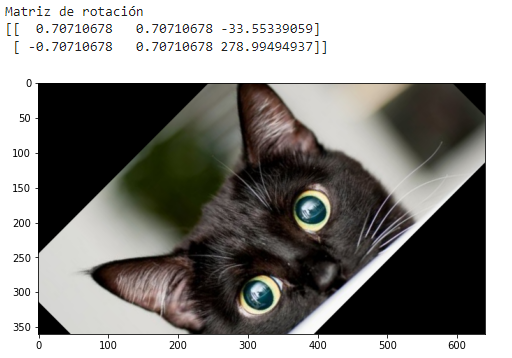

Matriz de rotación
[[  0.70710678   0.70710678 -33.55339059]
 [ -0.70710678   0.70710678 278.99494937]]



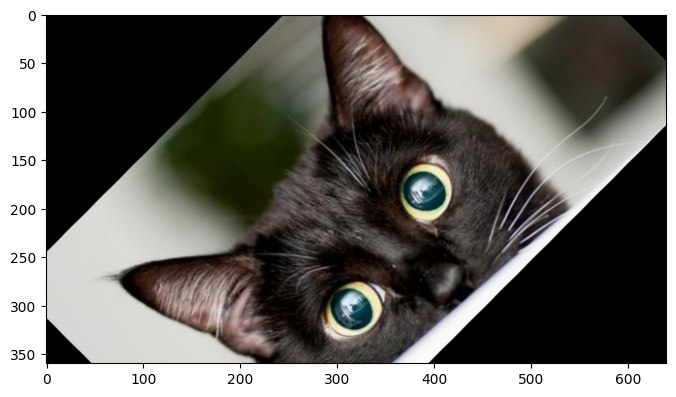

In [11]:
# Dividing height and width by 2 to get the center of the image
height, width = image.shape[:2]
center = (width/2, height/2)
angle = 45
scale = 1

# obtenemos la matriz de rotacion
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)
print('Matriz de rotación')
print(rotate_matrix)
print('\r')


# usamos la funcion openv para
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))

# mostramos la imagen
plt.imshow(rotated_image)
plt.show()

### **Redimensionar con factor de escalado**
En la siguiente actividad se redimensionar la imagen utilizando un factor de escalado de 1/3 en x y 1/2 en y. Mostrar resultados haciendo un subplot. Consultar : [learnopencv](https://learnopencv.com/image-rotation-and-translation-using-opencv/)

Este es el resultado esperado:

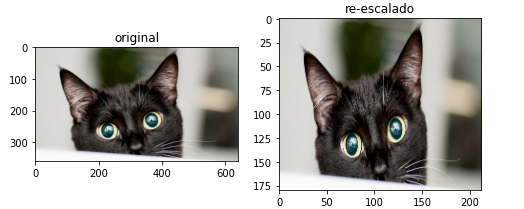

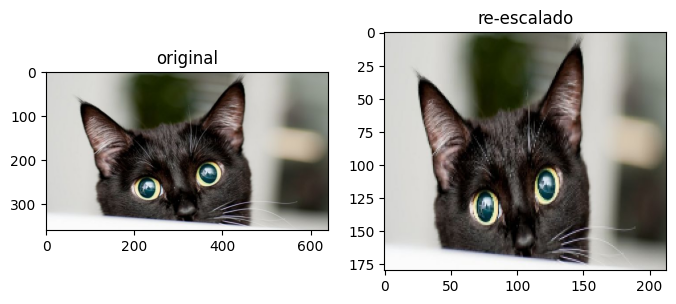

In [12]:
# obtenemos el tamaño de la imagen y creamos un size *2
height, width, channels = image.shape
dim = (width *2, height *4)

# usamos la fucion openv para redimensionar la imagen
resized_image = cv2.resize(image, None, fx= 1/3, fy= 1/2, interpolation= cv2.INTER_LINEAR)

# arrays para el bucle
titles = ['original', 're-escalado']
images = [image, resized_image]

# mostramos la imagen
for i in range(2):
  plt.subplot(121+i)
  plt.title(titles[i])
  plt.imshow(images[i])
plt.show()

### **Flip de la imagen**
En la siguiente actividad se pide girar la imagen usando un flip vertical, uno horizontal y ambos. Crear un subplot de la imagen originial y las tres resultantes de 2x2. Consultar el metodo [cv2.flip()](https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/)

Este es el resultado esperado:

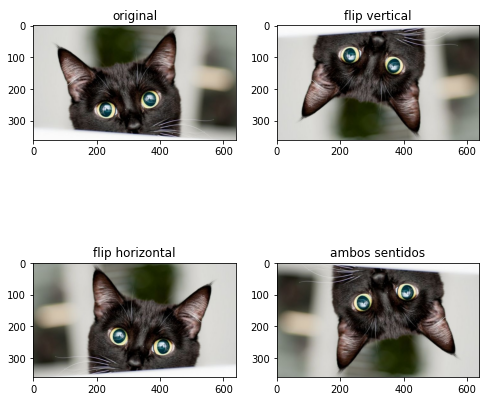

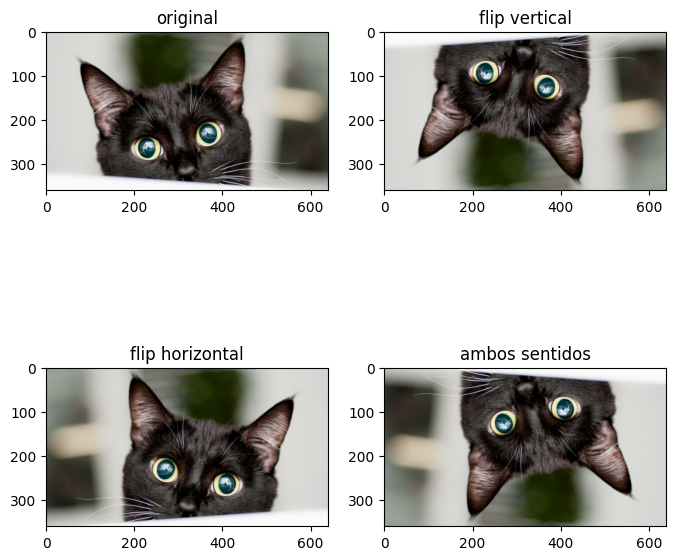

In [13]:
# tamaño del plot
nrows, ncols = 2, 2

# array que contiene un diccionario que define el titulo y la operacion
name_and_op = [{'title' : 'original', 'operation' : 99},
               {'title' : 'flip vertical', 'operation' : 0},
               {'title' : 'flip horizontal', 'operation' : 1},
               {'title' : 'ambos sentidos', 'operation' : -1}]

# creamos la figura para el plot
fig = plt.figure()

#Pintamos la imagen original
ax = fig.add_subplot(nrows, ncols, 1)
plt.title(name_and_op[0]['title'])
plt.imshow(image)

# recorremos el diccionario para crear los flips
for i in range(1,4):
  flipped = cv2.flip(image, name_and_op[i]['operation'])
  ax = fig.add_subplot(nrows, ncols, i+1)
  plt.title(name_and_op[i]['title'])
  plt.imshow(flipped)
plt.show()

### **Transformación afin**
En la siguiente actividad se pide crear una transformación afin seleccionando tres punto de la imagen original y tres puntos de destino para una imagen del mismo tamaño que la original. Printar la matriz resultante y mostrar un subplot con la imagen original y la resultante con los puntos seleccionados pintados sobre ellas. Consultar el metodo [cv2.getAffineTransform()](https://www.geeksforgeeks.org/python-opencv-affine-transformation/#:~:text=In%20Affine%20transformation%2C%20all%20parallel,Then%20cv2.)

Este es el resultado esperado:

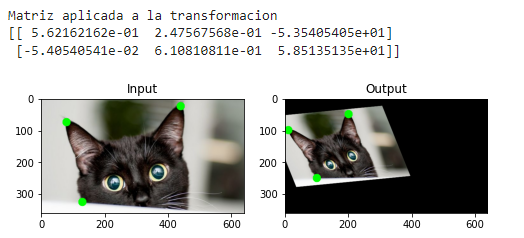

Matriz aplicada a la transformacion
[[ 5.62162162e-01  2.47567568e-01 -5.35405405e+01]
 [-5.40540541e-02  6.10810811e-01  5.85135135e+01]]



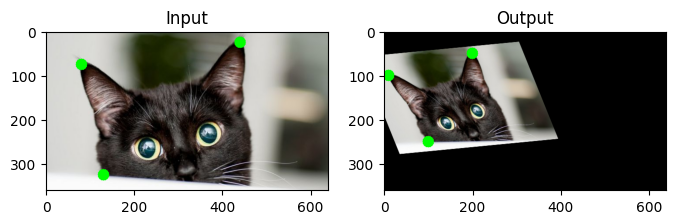

In [14]:
# obtenemos el tamaño de la imagen
original = image.copy()
height, width = image.shape[:2]

# constantes
radius = 0
color = (0, 255, 0)
thickness = 25

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[80,75],[440,25],[130,325]])
destination_points = np.float32([[10,100],[200,50],[100,250]])

# obtenemos la matriz de  translacion y rotación
M = cv2.getAffineTransform(original_points,destination_points)
print('Matriz aplicada a la transformacion')
print(M)
print('\r')

# aplicamos la matriz sobre la imagen
dst = cv2.warpAffine(image, M, (width,height))

# pintamos los puntos
for i in range(len(original_points)):
  center_original = (int(original_points[i][0]), int(original_points[i][1]))
  center_destination = (int(destination_points[i][0]), int(destination_points[i][1]))
  original = cv2.circle(original,
                        center_original,
                        radius = radius, 
                        color = color, 
                        thickness= thickness)
  dst = cv2.circle(dst,
                      center_destination,
                      radius = radius, 
                      color = color, 
                      thickness= thickness)

# pintamos las dos imagenes
plt.subplot(121),plt.imshow(original),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### **Transformación proyectiva**
En la siguiente actividad se pide crear una transformación proyectiva seleccionando cuatro puntos de la imagen original y cuatro puntos de destino correspondiente a las 4 esquinas de la imagen final que tiene que tener un tamaño de 600x600. Printar la matriz resultante y mostrar un subplot con la imagen original y la resultante con los puntos seleccionados pintados sobre la imagen original. Consultar el metodo [cv2.getPerspectiveTransform()](https://theailearner.com/tag/cv2-getperspectivetransform/)

Este es el resultado esperado:

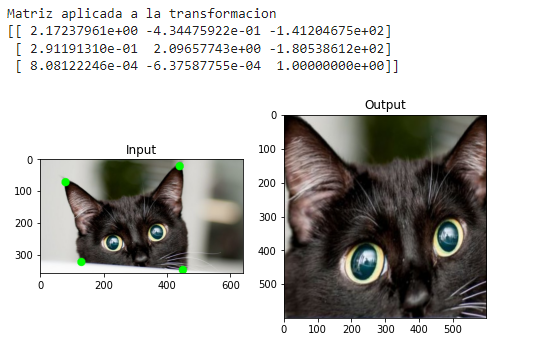

Matriz aplicada a la transformacion
[[ 2.17237961e+00 -4.34475922e-01 -1.41204675e+02]
 [ 2.91191310e-01  2.09657743e+00 -1.80538612e+02]
 [ 8.08122246e-04 -6.37587755e-04  1.00000000e+00]]



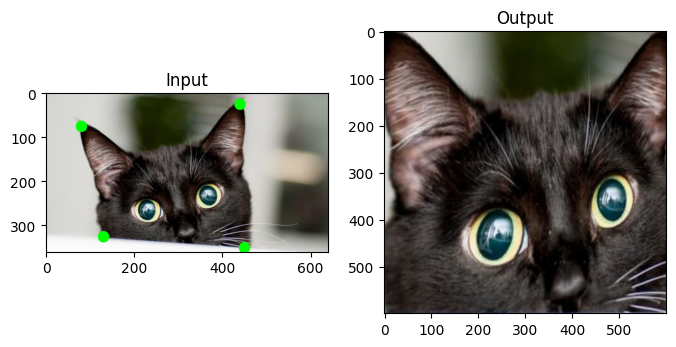

In [19]:
# copiamos la imagen
original = image.copy()

# obtenemos el tamaño de la imagen
height, width = image.shape[:2]

# constantes
radius = 0
color = (0, 255, 0)
thickness = 25
output_size = 600


# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[80,75],[440,25],[130,325],[450,350]])
destination_points = np.float32([[0,0],
                                 [output_size,0],
                                 [0,output_size],
                                 [output_size,output_size]])

# obtenemos la matriz de  translacion y rotación
M = cv2.getPerspectiveTransform(original_points,destination_points)
print('Matriz aplicada a la transformacion')
print(M)
print('\r')

# aplicamos la matriz sobre la imagen
dst = cv2.warpPerspective(original, M, (output_size,output_size))

# pintamos los puntos
for i in range(len(original_points)):
  center = (int(original_points[i][0]), int(original_points[i][1]))
  original = cv2.circle(original, 
                        center, 
                        radius=radius, 
                        color=color, 
                        thickness=thickness)

# pintamos las dos imagenes
plt.subplot(121),plt.imshow(original),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()